# Caso TelecomX

## Introducción

El presente problema trata sobre el número creciente de cancelaciones que enfrenta la empresa de telecomunicaciones Telecom X. Esta tendencia ha generado preocupación, por lo que es necesario comprender los factores que llevan a los clientes a cancelar el servicio.
Ante esta problemática, el objetivo es comprender los factores que provocan la pérdida de clientes en Telecom X, con el fin de reducir la tasa de cancelaciones.

## Limpieza y Tratamiento de Datos

Antes que nada se importaron las librerías que utilice, se importo pandas, numpy, matplotlib y seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Extracción

Debido a problemas para trabajr con google colab, he decidido trabajar locamente, por lo que los datos fueron importados desde la computadora personal.

In [2]:
datos = pd.read_json('/Users/enocjoaquin/Downloads/TelecomX_Data.json')

### Procesar

En primera instancia, veo que el documento tiene 6 columnas (sin contar el index) de las cuales 4 se encontraban anidadas en diccionarios y que seguramente contaban con información valiosa.

In [3]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


También revise la información general de la base de datos, me doy cuenta que todos los datos, de momento, son Sting

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Revise si existían datos nulo pero se arrojó que no existían datos nulos

In [5]:
datos.isnull().values.any()

np.False_

### Descomprimiendo diccionarios 

El siguiente paso fue descomprimir los diccionarios que contenía el DataFrame por lo que primero se creó una lista donde se contendría el nombre de las columnas con dicha condición.

Mediante la ayuda de “json_normalize” se normalizaron todas las columnas anidadas y en la siguiente línea de código se les cambio el nombre para no confundirse, pero al mismo tiempo para relacionarlas con su columna madre. En la última línea de código de esta sección se unió todas las tablas obtenidas en una sola para poder trabajar en un único DataFrame

In [6]:
columnas_dic = ['customer', 'phone', 'internet', 'account']

col_expandidos = [pd.json_normalize(datos[col]) for col in columnas_dic]

col_expandidos = [df.add_prefix(f"{col}_") for df, col in zip(col_expandidos, columnas_dic)]

datos_expandido = pd.concat([datos.drop(columns=columnas_dic)] + col_expandidos, axis=1)

Se revisa la tabla y se puede ver que las nuevas columnas estan incluidas

In [7]:
datos_expandido.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
datos_expandido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

Al revisar la información del DataFrame, me di cuenta que las columnas tenían un orden coherente y que estaban clasificadas por su tipo de dato correcto excepto por la columna account_Charges.Total que debería de ser float pero era string. Usamos la siguiente función para saber si exisnten datos tipo string dentro de la columna pero no se puede vizulaizar ningun error.

In [9]:
pd.to_numeric(datos_expandido['account_Charges.Total'],errors='coerce').isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7262    False
7263    False
7264    False
7265    False
7266    False
Name: account_Charges.Total, Length: 7267, dtype: bool

Transformamos los datos numéricos a float64 y aquellos que no lo son se transforman en NaN para posteriormente ser eliminados en la siguiente línea de código y por ultimo verificamos si se ha efectuado el cambio.

In [10]:
datos_expandido['account_Charges.Total'] = pd.to_numeric( datos_expandido['account_Charges.Total'], errors='coerce')

datos_expandido = datos_expandido.dropna(subset=['account_Charges.Total'])


In [11]:
datos_expandido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer_gender            7256 non-null   object 
 3   customer_SeniorCitizen     7256 non-null   int64  
 4   customer_Partner           7256 non-null   object 
 5   customer_Dependents        7256 non-null   object 
 6   customer_tenure            7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   object 
 8   phone_MultipleLines        7256 non-null   object 
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   object 
 11  internet_OnlineBackup      7256 non-null   object 
 12  internet_DeviceProtection  7256 non-null   object 
 13  internet_TechSupport       7256 non-null   object 
 1

De igual menera, efectuamos la siguiente linea de codigo para eliminar cualquier caracter inusual dentro de la columna "Churn" para que no haya problema

In [12]:
datos_expandido['Churn'] = datos_expandido['Churn'].str.replace('\{|}|\"','',regex=True)

## Análisis Exploratorio de Datos

Dividimos la columna “account_Charges.Monthly” entre 30 para obtener el gasto diario de los clientes de Telecom, verificamos que la columna se agregó correctamente con uso de la función “.head()” y se verifico los datos con la función “.describe()” donde se verifico el promedio, lo máximo y mino que  gasta un cliente diaria por el servicio ofrecido.

In [13]:
datos_expandido['daily_Accounts'] = datos_expandido['account_Charges.Monthly'].div(30)

In [14]:
datos_expandido.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,daily_Accounts
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


De igual menara, se buscó las valores promedio, máximo y mínimo de las demás columnas que tuvieran relación con gastos hechos por el clientes al adquirir algún servicio.

In [16]:
datos_expandido.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,account_Charges.Total,daily_Accounts
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213,2.158514
std,0.3693,24.558067,30.125739,2268.632997,1.004191
min,0.0000,1.000000,18.250000,18.800000,0.608333
25%,0.0000,9.000000,35.450000,400.225000,1.181667
50%,0.0000,29.000000,70.300000,1391.000000,2.343333
75%,0.0000,55.000000,89.900000,3785.300000,2.996667
max,1.0000,72.000000,118.750000,8684.800000,3.958333


Se realizo el conteo de las personas que han abandonado la adquisición de los servicios de Telecom pero al realizar la operación se obtiene que hay 224 datos que parecieran nulos debido a que no representan nada por lo que se procede a corregir el problema con estos datos.

In [19]:
conteo = datos_expandido['Churn'].groupby(datos_expandido['Churn']).count()
conteo

Churn
        224
No     5163
Yes    1869
Name: Churn, dtype: int64

Mediante la función “dropna()” se trató de eliminar los datos nulos de la columna “churn” pero a revisar la tabla los datos que se supone no tenían nada y por ende nulos, no se encontraban vacíos y se asume que estaban representados por un espacio 

In [20]:
datos_limpios = datos_expandido.dropna(subset=['Churn'])
datos_limpios.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,daily_Accounts
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [22]:
conteo = datos_expandido['Churn'].groupby(datos_expandido['Churn']).count()
conteo

Churn
        224
No     5163
Yes    1869
Name: Churn, dtype: int64

Revisamos cuales eran los datos que tenían esta condición para saber más a fondo que más contenían y después se eliminaron para que no perjudicaran el análisis. Al verificar los datos ya encontraban correctos y sin datos que no se encontraran fuera de lugar.

In [23]:
datos_expandido[datos_expandido['Churn'].str.strip() == '']

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,daily_Accounts
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,2.633333
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,0.663333
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,1.958333
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,1.996667
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,1.808333
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,1.355000
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,2.541667
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,0.641667


In [24]:
datos_expandido = datos_expandido[datos_expandido['Churn'].str.strip() != '']

In [25]:
conteo = datos_expandido['Churn'].groupby(datos_expandido['Churn']).count()
conteo

Churn
No     5163
Yes    1869
Name: Churn, dtype: int64

### Clientes dados de baja

Al observar la tabla y la gráfica nos podemos dar cuenta que cerca del 27% de los clientes con los que contaba ha dejado de serlo 

/var/folders/bj/b5mnbdrx5cq2gnvn_6ccr4jr0000gn/T/ipykernel_1442/1507934535.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=datos_expandido, x='Churn', palette=palette, legend=False)


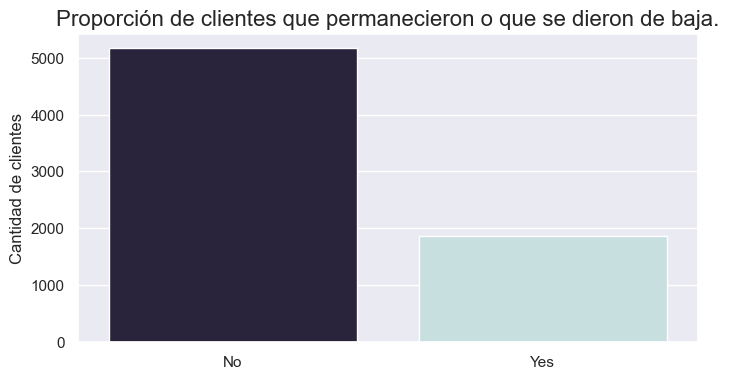

In [28]:
def generar_grafico(palette):

    fig, ax = plt.subplots(figsize=(8,4))
    

    ax = sns.countplot(data=datos_expandido, x='Churn', palette=palette, legend=False)
    ax.set_title('Proporción de clientes que permanecieron o que se dieron de baja.',
                loc='center',fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('Cantidad de clientes')
    #sns.despine()

    plt.show()



sns.set_theme(style='darkgrid')
generar_grafico('ch:start=.2,rot=-.3_r')

Se solicito que se observara si el sexo del cliente tenía alguna relación con el deserción del servicio pero los datos arrojaron que la cantidad de los clientes que se quedan y se van es similar para ambos sexos, por lo que no es una posibilidad que sea un factor que determine la salida de clientes.

In [27]:
genero = pd.crosstab(datos_expandido['customer_gender'], datos_expandido['Churn'], normalize='index') * 100
genero


Churn,No,Yes
customer_gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


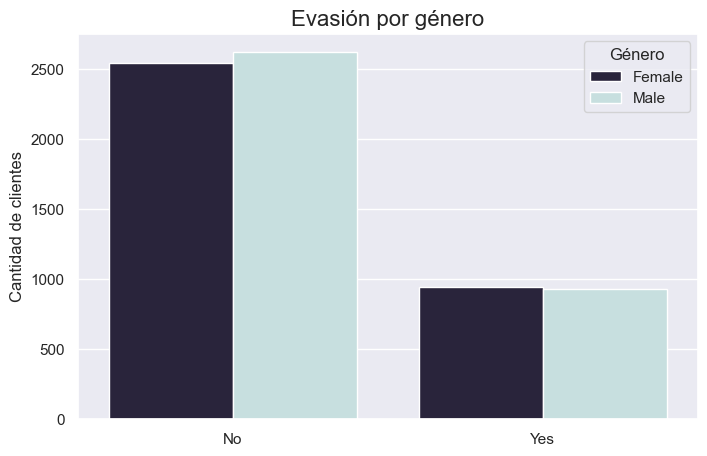

In [29]:
def generar_grafico(palette):

    plt.figure(figsize=(8, 5))
    sns.countplot(data=datos_expandido, x='Churn', hue='customer_gender', palette=palette, legend=True)

    plt.title('Evasión por género', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Cantidad de clientes', fontsize=12)
    plt.legend(title='Género')
    plt.show()

sns.set_theme(style='darkgrid')
generar_grafico('ch:start=.2,rot=-.3_r')

Cuando revisamos la evasión por tipo de contrato, nos damos cuenta que se hay resultados importantes debido a que la mayor parte de las personas que abandonan el servicio se encuentran dentro del plan mensual, mientras los menos desertan son aquellos con planes anuales y como se puede observar, la mayor parte de las personas que se han quedado con Telecom también cuentan con el servicio mensual y por ende, una mayor chance de desertar. 

In [30]:
pd.crosstab(datos_expandido['account_Contract'], datos_expandido['Churn'], normalize='index') * 100

Churn,No,Yes
account_Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


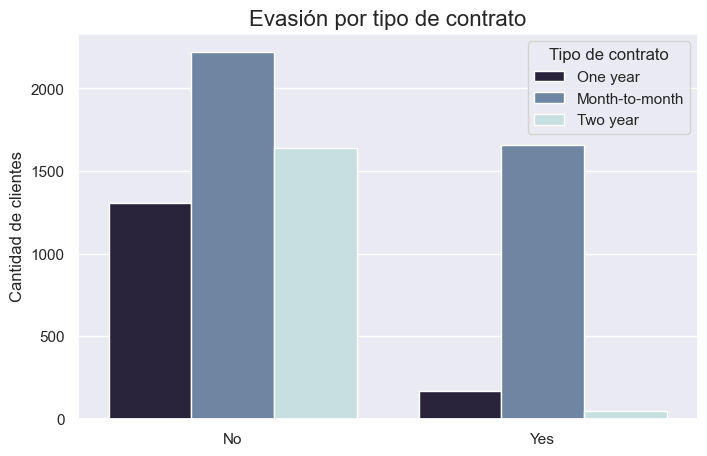

In [31]:
def generar_grafico(palette):

    plt.figure(figsize=(8, 5))
    sns.countplot(data=datos_expandido, x='Churn', hue='account_Contract', palette=palette, legend=True)

    plt.title('Evasión por tipo de contrato', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Cantidad de clientes', fontsize=12)
    plt.legend(title='Tipo de contrato')

    plt.show()


sns.set_theme(style='darkgrid')
generar_grafico('ch:start=.2,rot=-.3_r')

Cuando revisamos el método de pago de los clientes, observamos nuevamente resultados relevantes. Se observa que entre los clientes que se quedan con Telecom los métodos de pago son muy diversos, ninguno sobresale de otro en cuanto uso, pero para aquellos que deciden retirarse, el 42% pagaba mediante cheque electrónico (Electronic check)

In [32]:
pd.crosstab(datos_expandido['account_PaymentMethod'], datos_expandido['Churn'], normalize='index') * 100


Churn,No,Yes
account_PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


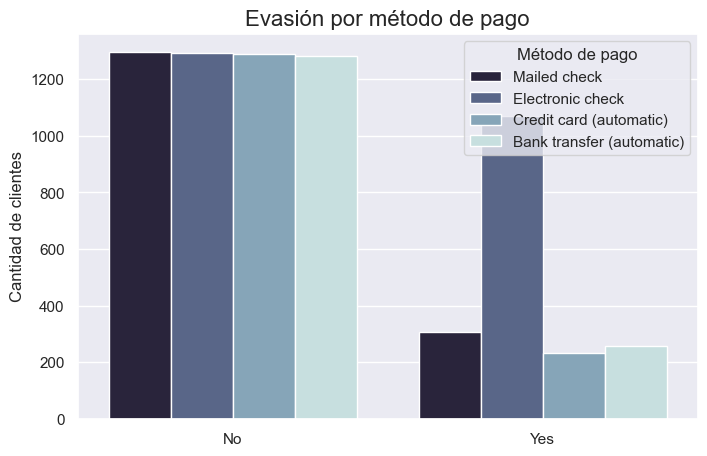

In [33]:
def generar_grafico(palette):

    plt.figure(figsize=(8, 5))
    sns.countplot(data=datos_expandido, x='Churn', hue='account_PaymentMethod', palette=palette, legend=True)

    plt.title('Evasión por método de pago', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Cantidad de clientes', fontsize=12)
    plt.legend(title='Método de pago')

    plt.show()


sns.set_theme(style='darkgrid')
generar_grafico('ch:start=.2,rot=-.3_r')

Cuando observamos la cantidad total gastada por los grupos de los clientes que abandonan y los que no, se observan cantidades similares, aunque en promedio los que se quedan dentro del servicio pagan más de los que no lo hacen

In [35]:
datos_expandido.groupby('Churn')['account_Charges.Total'].agg(['min', 'mean', 'max', 'count'])

,min,mean,max,count
Churn,,,,
No,18.80,2555.344141,8672.45,5163
Yes,18.85,1531.796094,8684.80,1869


También se observa que los aquellos que abandonan se quedan un promedio de 1.5 años con Telecom

In [36]:
datos_expandido.groupby('Churn')['customer_tenure'].agg(['min', 'mean', 'max', 'count'])

,min,mean,max,count
Churn,,,,
No,1,37.650010,72,5163
Yes,1,17.979133,72,1869


## Conclución

Se han encontrado tres vertientes que influyen en la salida de clientes
1.	El plan mensual: este plan es el más popular, pero al mismo tiempo el que acumula mayor tasa de deserción, si bien un plan mensual puede resultar atractivo y es mas propenso a presentar abandono
2.	El pago con cheque electrónico: los usuarios que usan este método de pago son más susceptibles a abandonar, lo que podría estar relacionado con una mala experiencia de pago como errores, falta de automatización o al perfil del cliente.
3.	El tiempo: se observó que un usuario que abandona en promedio dura 17 meses (1.5 años) por lo que se puede intuir que el problema que se puede presentar al inicio de contratación se acumula debido a falta de atención


## Plan de acción

Para reducir la pérdida de clientes, se recomienda incentivar la migración del plan mensual hacia opciones anuales o de dos años mediante descuentos exclusivos y beneficios adicionales, especialmente en momentos críticos como el mes 12 de permanencia. Asimismo, se sugiere revisar el proceso de pago por "electronic check", identificando posibles fricciones y promoviendo métodos más confiables como tarjeta de crédito o transferencia bancaria con incentivos. Dado que los clientes tienden a abandonar el servicio tras aproximadamente 18 meses, se propone implementar un modelo predictivo de churn que permita detectar usuarios en riesgo y activar campañas personalizadas de retención. Finalmente, se recomienda establecer un programa de fidelización con recompensas periódicas para reforzar el compromiso a largo plazo y mejorar la experiencia del cliente.